In [32]:
import torch
from torch.utils.data import DataLoader
from cellshape_cloud.vendor.chamfer_distance import ChamferLoss
from cellshape_cloud.pointcloud_dataset import (
    PointCloudDataset,
    SingleCellDataset,
)
from cellshape_cloud.cloud_autoencoder import CloudAutoEncoder

path = "/run/user/1128299809/gvfs/smb-share:server=rds.icr.ac.uk,share=data/DBI/DUDBI/DYNCESYS/"\
        "mvries/ResultsAlma/cellshape-cloud/" \
 "foldingnet_foldingnet_50_plane_001/NewFoldingNet/pqzsa5ly/checkpoints/epoch=245-step=62976.ckpt"

In [34]:
from cellshape_cloud.lightning_autoencoder import CloudAutoEncoderPL
import easydict

model = CloudAutoEncoder(
    num_features=50,
    k=10,
    encoder_type="foldingnet",
    decoder_type="foldingnet",
    shape="plane",
    gaussian_path = "/home/mvries/Documents/GitHub/cellshape-cloud/cellshape_cloud/vendor/gaussian.npy"
)
args = easydict.EasyDict(
                {"learning_rate_autoencoder": 0.0001,
                   "encoder_type": "foldingnet",
                   "decoder_type": "foldingnet",
                   "k": 20,
                "dataframe_path": "",
                "cloud_dataset_path": "",
                "batch_size": 1,
                "pretrained_path": "",
                "dataset_type": "Other",
                "shape": "gaussian"})

model = CloudAutoEncoderPL(args=args, model=model)
checkpoint = torch.load(path)
model_dict = model.state_dict()  # load parameters from pre-trained FoldingNet

model.load_state_dict(checkpoint["state_dict"])

<All keys matched successfully>

In [35]:
checkpoint

{'epoch': 245,
 'global_step': 62976,
 'pytorch-lightning_version': '1.7.2',
 'state_dict': OrderedDict([('model.encoder.mlp1.0.weight',
               tensor([[[-2.9755e-01],
                        [-2.8071e-01],
                        [ 2.6646e-01],
                        [-1.2483e-01],
                        [-9.7752e-02],
                        [-2.0169e-02],
                        [-1.8019e-01],
                        [ 1.9503e-01],
                        [ 1.1905e-01],
                        [-1.3008e-01],
                        [ 1.5234e-01],
                        [ 6.8165e-03]],
               
                       [[-2.6070e-01],
                        [-2.7723e-01],
                        [ 3.0185e-01],
                        [ 1.0796e-01],
                        [ 1.0482e-01],
                        [-8.6872e-02],
                        [ 1.0300e-01],
                        [ 1.3256e-01],
                        [-1.7758e-01],
                        [-2

In [36]:
torch.cuda.is_available()

True

In [37]:
root_dir = "/mnt/nvme0n1/Datasets/SingleCellFromNathan_17122021/"
df = "/mnt/nvme0n1/Datasets/SingleCellFromNathan_17122021/all_cell_data.csv"
dataset = SingleCellDataset(df, root_dir, cell_component="cell")

dataloader = DataLoader(dataset, batch_size=1, shuffle=False)

In [38]:
from tqdm import tqdm

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()
all_feat = []
all_outputs = []
all_inputs = []
labels = []
serial_numbers = []
for data in tqdm(dataloader):
    inputs = data[0]
    lab = data[1]
    ser_num = data[3]
    inputs = inputs.to(device)
    batch_size = inputs.shape[0]

    output, features = model.model(inputs)
    all_inputs.append(torch.squeeze(inputs).detach().cpu().numpy())
    all_outputs.append(torch.squeeze(output).detach().cpu().numpy())
    all_feat.append(torch.squeeze(features).detach().cpu().numpy())
    labels.append(lab[0])
    serial_numbers.append(ser_num[0])

100%|████████████████████████████████████| 70167/70167 [06:17<00:00, 186.04it/s]


In [39]:
labels

[tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tensor([9]),
 tenso

In [41]:
import pandas as pd

data = pd.DataFrame(all_feat)
data['serialNumber'] = serial_numbers
data.to_csv("/mnt/nvme0n1/Datasets/SingleCellFromNathan_17122021/foldingnet_foldinget_plane_50_k10_cell.csv")

In [42]:
root_dir = "/mnt/nvme0n1/Datasets/SingleCellFromNathan_17122021/"
df = "/mnt/nvme0n1/Datasets/SingleCellFromNathan_17122021/all_cell_data.csv"
dataset = SingleCellDataset(df, root_dir, cell_component="nuc")

dataloader = DataLoader(dataset, batch_size=1, shuffle=False)

In [43]:
from tqdm import tqdm

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()
all_feat = []
all_outputs = []
all_inputs = []
labels = []
serial_numbers = []
for data in tqdm(dataloader):
    inputs = data[0]
    lab = data[1]
    ser_num = data[3]
    inputs = inputs.to(device)
    batch_size = inputs.shape[0]

    output, features = model.model(inputs)
    all_inputs.append(torch.squeeze(inputs).detach().cpu().numpy())
    all_outputs.append(torch.squeeze(output).detach().cpu().numpy())
    all_feat.append(torch.squeeze(features).detach().cpu().numpy())
    labels.append(lab[0])
    serial_numbers.append(ser_num[0])

100%|████████████████████████████████████████████████████████████████████████████████████████████| 70167/70167 [05:28<00:00, 213.62it/s]


In [44]:
import pandas as pd

data = pd.DataFrame(all_feat)
data['serialNumber'] = serial_numbers
data.to_csv("/mnt/nvme0n1/Datasets/SingleCellFromNathan_17122021/foldingnet_foldinget_plane_50_k10_nuc.csv")

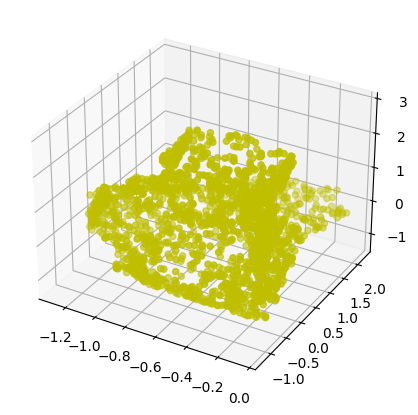

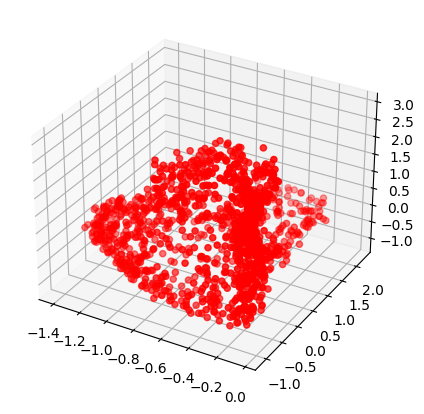

In [19]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

number = 101
points = all_inputs[number]

outs = all_outputs[number]

fig = plt.figure(figsize=(5, 5))

ax = plt.axes(projection="3d")
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c="y", marker="o", s=20)

fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection="3d")
ax.scatter(outs[:, 0], outs[:, 1], outs[:, 2], c="r", marker="o", s=20)